# IPL Bowler Analysis

## Importing the libraries & starter function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pylab as pl
import json
import matplotlib.patches as mpatches
import datetime

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from gmplot import gmplot
from IPython.display import Markdown, display

%matplotlib inline

### Function for printing in markdown

In [2]:
def printmd(string):
    display(Markdown(string))

## Storing csv file in a variable
storing matches.csv in variable data_setm
storing deliveries.csv in variable data_set

In [3]:
data_setm = pd.read_csv('datasets/matches.csv')
data_set = pd.read_csv('datasets/deliveries.csv')

data_setm.columns = ['match_id','season','city','date','team1','team2','toss_winner','toss_decision','result','dl_applied','winner','win_by_runs','win_by_wickets','player_of_match','venue','umpire1','umpire2','umpire3']

data_set = pd.merge(data_set, data_setm, on='match_id')
data_set

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### Columns in the merged dataset

In [4]:
print(data_set.columns.values)

['match_id' 'inning' 'batting_team' 'bowling_team' 'over' 'ball' 'batsman'
 'non_striker' 'bowler' 'is_super_over' 'wide_runs' 'bye_runs'
 'legbye_runs' 'noball_runs' 'penalty_runs' 'batsman_runs' 'extra_runs'
 'total_runs' 'player_dismissed' 'dismissal_kind' 'fielder' 'season'
 'city' 'date' 'team1' 'team2' 'toss_winner' 'toss_decision' 'result'
 'dl_applied' 'winner' 'win_by_runs' 'win_by_wickets' 'player_of_match'
 'venue' 'umpire1' 'umpire2' 'umpire3']


## Display data in tabular form

In [5]:
class ListTable(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)

## Calculating the performance of the bowlers

**The bowler performance has been stored as follows:**
{ NAME: [ Total balls, Total runs, Total wickets, Wide balls, No balls] }

In [6]:
bowler_performance = {}

for index in range(0, len(data_set['bowler'])):
    try:
        total_balls = bowler_performance[data_set['bowler'][index]][0] + 1
        total_runs = bowler_performance[data_set['bowler'][index]][1] + data_set['total_runs'][index]
        total_wickets = bowler_performance[data_set['bowler'][index]][2]
        
        wide_balls = bowler_performance[data_set['bowler'][index]][3]
        no_balls = bowler_performance[data_set['bowler'][index]][4]
        
        if(data_set['wide_runs'][index] != 0):
            wide_balls = wide_balls + 1
        if(data_set['noball_runs'][index] != 0):
            no_balls = no_balls + 1
        
        try:
            if(math.isnan(data_set['dismissal_kind'][index])):
                bowler_performance[data_set['bowler'][index]] = [total_balls, total_runs, total_wickets, wide_balls, no_balls]
        except:
            total_wickets = bowler_performance[data_set['bowler'][index]][2] + 1
            bowler_performance[data_set['bowler'][index]] = [total_balls, total_runs, total_wickets, wide_balls, no_balls]
            
    except:
        try:
            if(math.isnan(data_set['dismissal_kind'][index])):
                bowler_performance[data_set['bowler'][index]] = [0, data_set['total_runs'][index], 1, 0, 0 ]
        except:
            bowler_performance[data_set['bowler'][index]] = [0, data_set['total_runs'][index], 0, 0, 0 ]

In [7]:
analysis_condition = ListTable()

analysis_condition.append(['Name', 'Total balls', 'Total runs', 'Total wickets','Wide balls', 'No balls'])
for i in bowler_performance:
    analysis_condition.append([[i][0], bowler_performance[i][0], bowler_performance[i][1], bowler_performance[i][2], bowler_performance[i][3], bowler_performance[i][4]])
analysis_condition

Name,Total balls,Total runs,Total wickets,Wide balls,No balls
TS Mills,110,157,6,4,0
A Choudhary,107,144,6,6,1
YS Chahal,1218,1600,73,25,3
S Aravind,787,1057,49,27,1
SR Watson,1960,2490,101,87,13
TM Head,47,81,4,0,0
STR Binny,553,686,28,14,0
A Nehra,1973,2537,122,57,9
B Kumar,2053,2410,118,68,5
BCJ Cutting,170,234,10,4,0


### Storing the performances in individual arrays

In [8]:
count = 1

index_positions = []
total_balls = []
total_runs = []
bowler_names = []
total_dismissals = []
total_wideballs = []
total_noballs = []

total_bowling_average = []
total_strike_rates = []
total_economy_rates = []

for player in bowler_performance:
    bowler_names.append(player)
    
    total_balls.append(bowler_performance[player][0])
    total_runs.append(bowler_performance[player][1])
    total_dismissals.append(bowler_performance[player][2])
    total_wideballs.append(bowler_performance[player][3])
    total_noballs.append(bowler_performance[player][4])
    
    try:
        total_bowling_average.append(float(bowler_performance[player][1])/float(bowler_performance[player][2]))
    except:
        total_bowling_average.append(-1)
    try:
        total_strike_rates.append(float(bowler_performance[player][0])/float(bowler_performance[player][2]))
    except:
        total_strike_rates.append(-1)
    try:
        total_economy_rates.append(float(bowler_performance[player][1])/float(bowler_performance[player][0]/7))
    except:
        total_economy_rates.append(-1)

    index_positions.append(count)
    count = count + 1

## Analysis & plotting of the calculated statistics

### Analysing the co-relation between the stats

In [9]:
bowler_dict = {"Balls":total_balls, "Runs":total_runs, "Dismissals":total_dismissals, "Wide balls":total_wideballs, "No balls":total_noballs, "Strike rate": total_strike_rates, "Bowling average": total_bowling_average, "Economy rate": total_economy_rates}
bowler_dataframe = pd.DataFrame(bowler_dict)
bowler_dataframe.corr()

,Balls,Bowling average,Dismissals,Economy rate,No balls,Runs,Strike rate,Wide balls
Balls,1.000000,-0.024085,0.981282,-0.252837,0.603706,0.995869,0.126275,0.897703
Bowling average,-0.024085,1.000000,-0.093420,0.102406,0.012917,-0.010119,0.907664,-0.017725
Dismissals,0.981282,-0.093420,1.000000,-0.246801,0.607443,0.978270,0.045962,0.887134
Economy rate,-0.252837,0.102406,-0.246801,1.000000,-0.140225,-0.240848,-0.224040,-0.220120
No balls,0.603706,0.012917,0.607443,-0.140225,1.000000,0.619493,0.085270,0.656284
Runs,0.995869,-0.010119,0.978270,-0.240848,0.619493,1.000000,0.130351,0.900756
Strike rate,0.126275,0.907664,0.045962,-0.224040,0.085270,0.130351,1.000000,0.107562
Wide balls,0.897703,-0.017725,0.887134,-0.220120,0.656284,0.900756,0.107562,1.000000


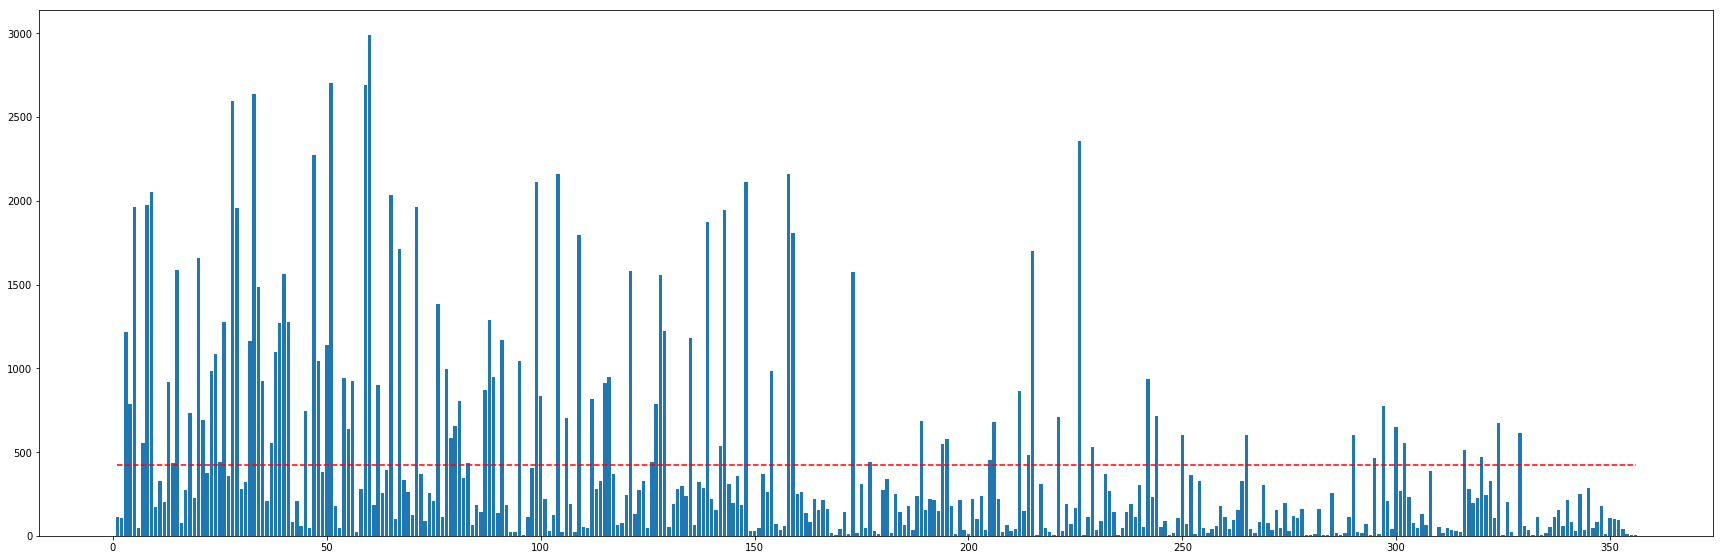

In [10]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_balls)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_balls))
plt.plot(index_positions, mean, c = "red", linestyle='--')

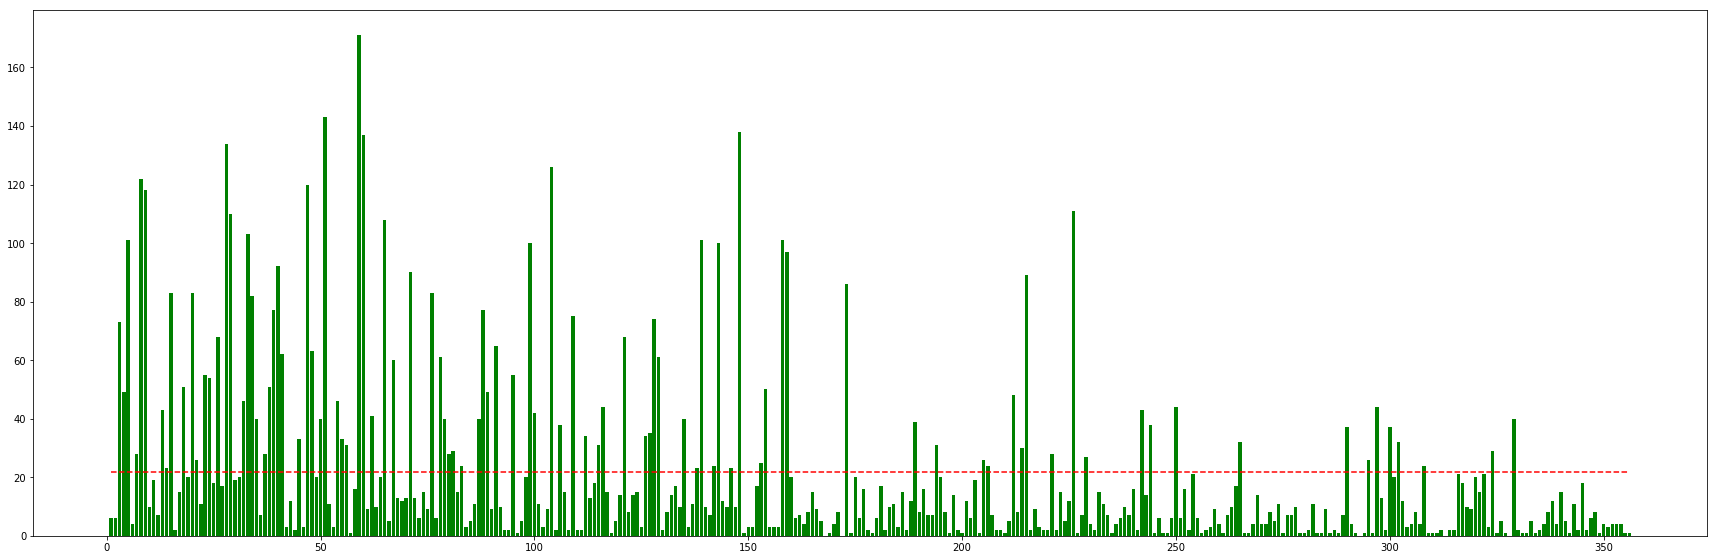

In [11]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_dismissals, color = "green")

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_dismissals))
plt.plot(index_positions, mean, c = "red", linestyle='--')

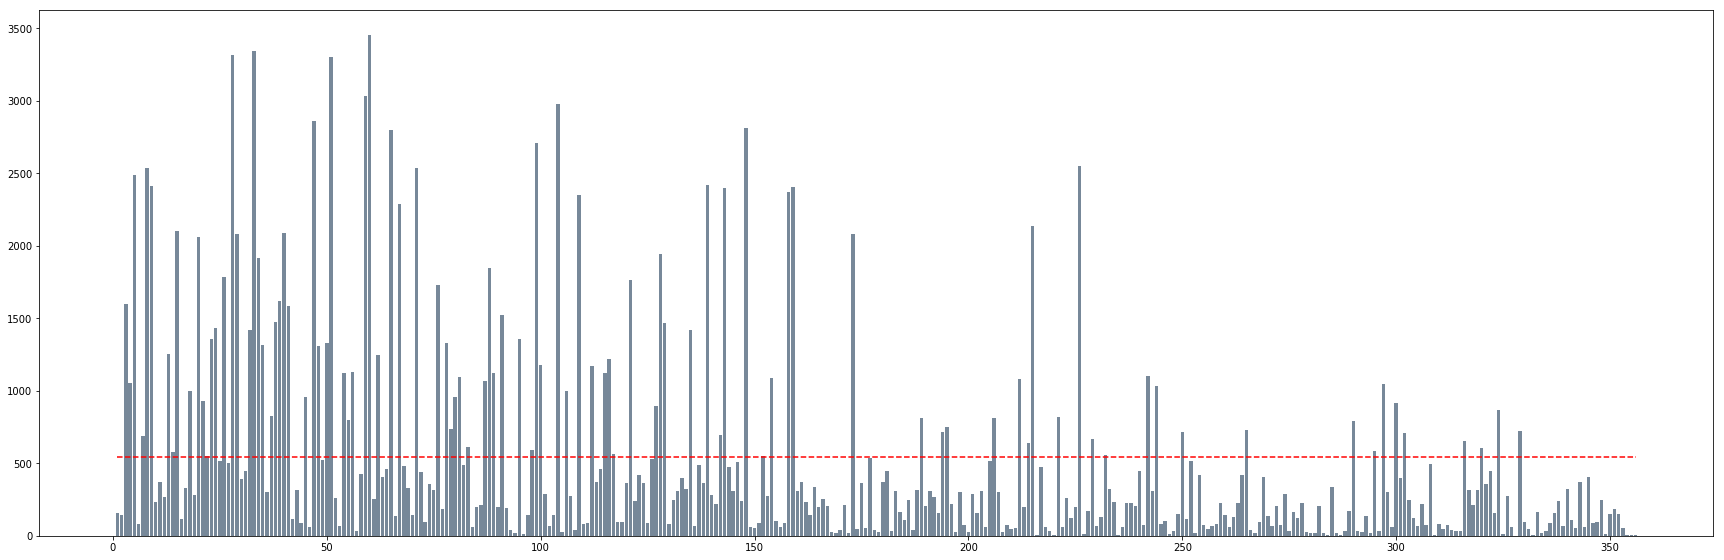

In [12]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_runs, color = "lightslategray")

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_runs))
plt.plot(index_positions, mean, c = "red", linestyle='--')

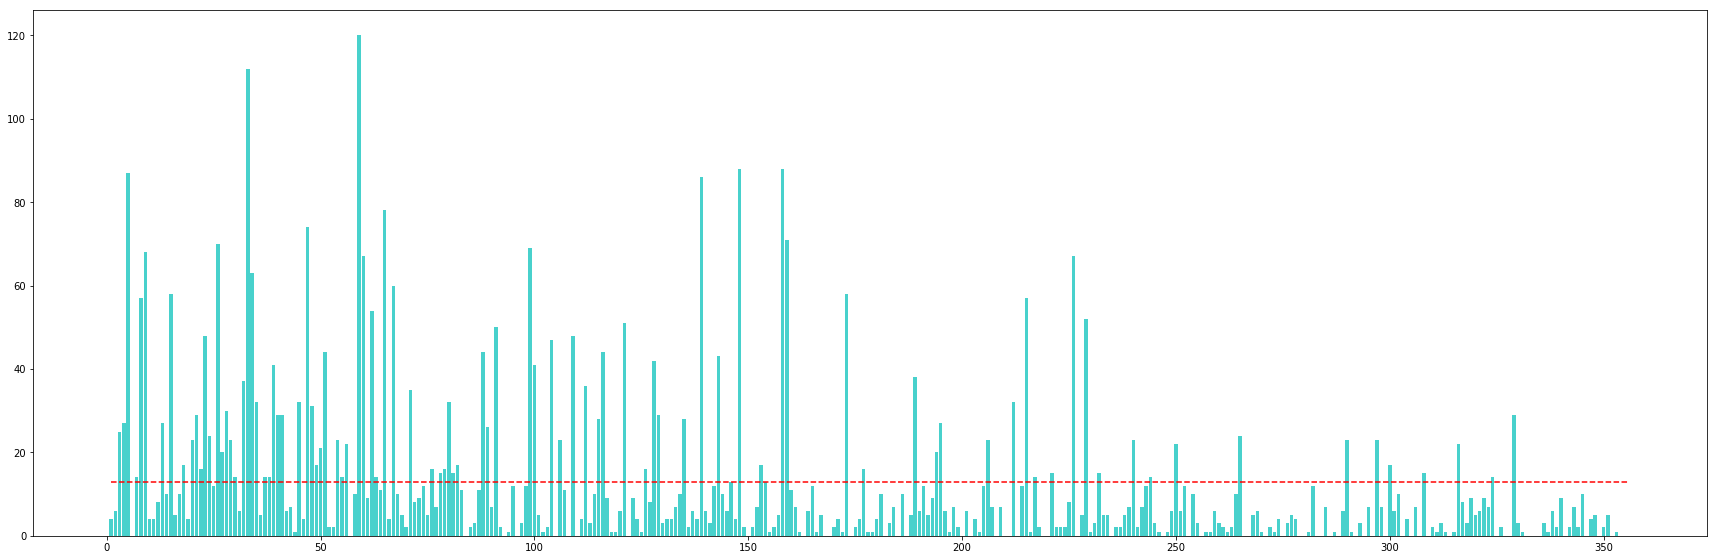

In [13]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_wideballs, color = "mediumturquoise")

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_wideballs))
plt.plot(index_positions, mean, c = "red", linestyle='--')

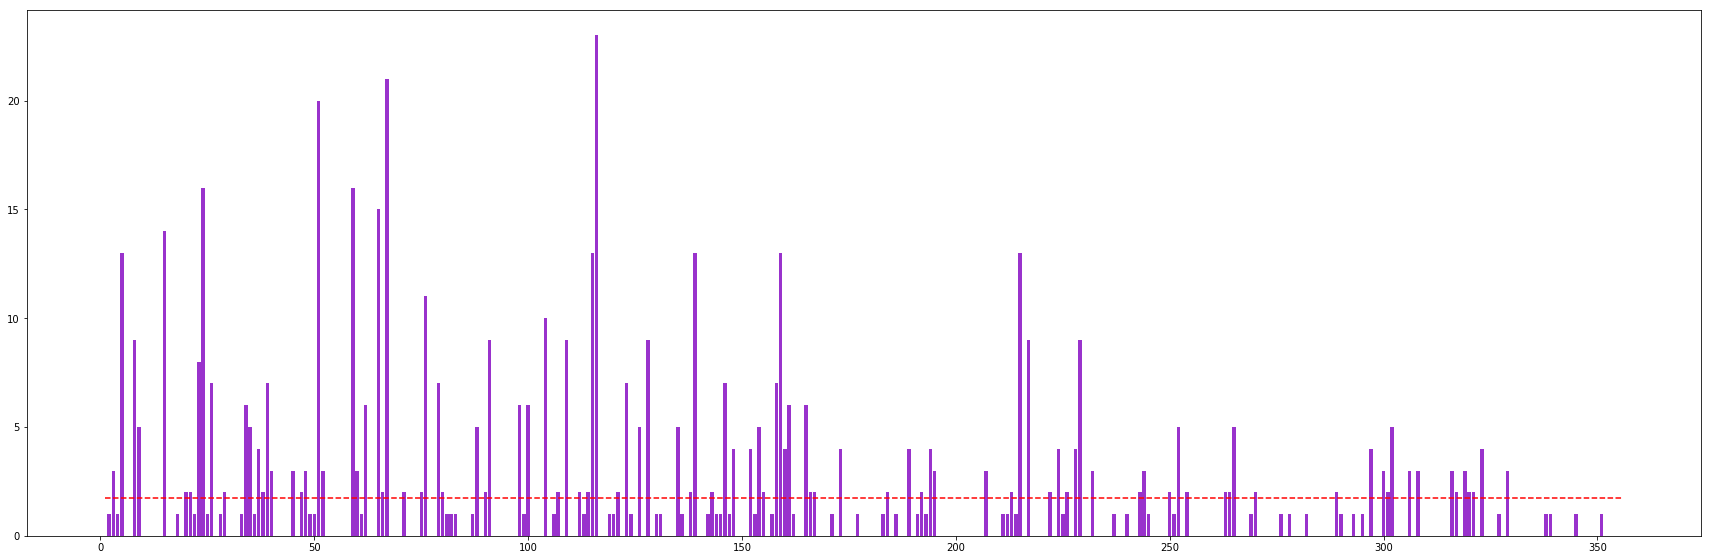

In [14]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_noballs, color = "darkorchid" )

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_noballs))
plt.plot(index_positions, mean, c = "red", linestyle='--')

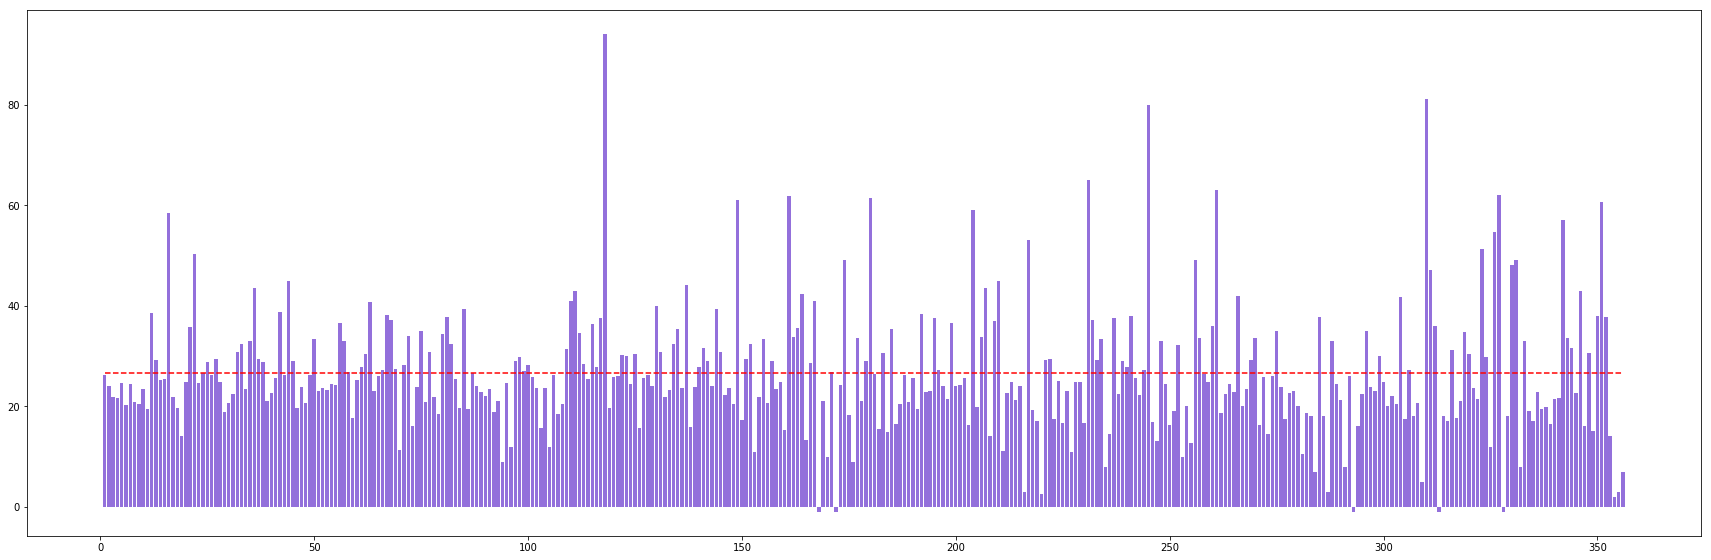

In [15]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_bowling_average, color = "mediumpurple")

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_bowling_average))
plt.plot(index_positions, mean, c = "red", linestyle='--')

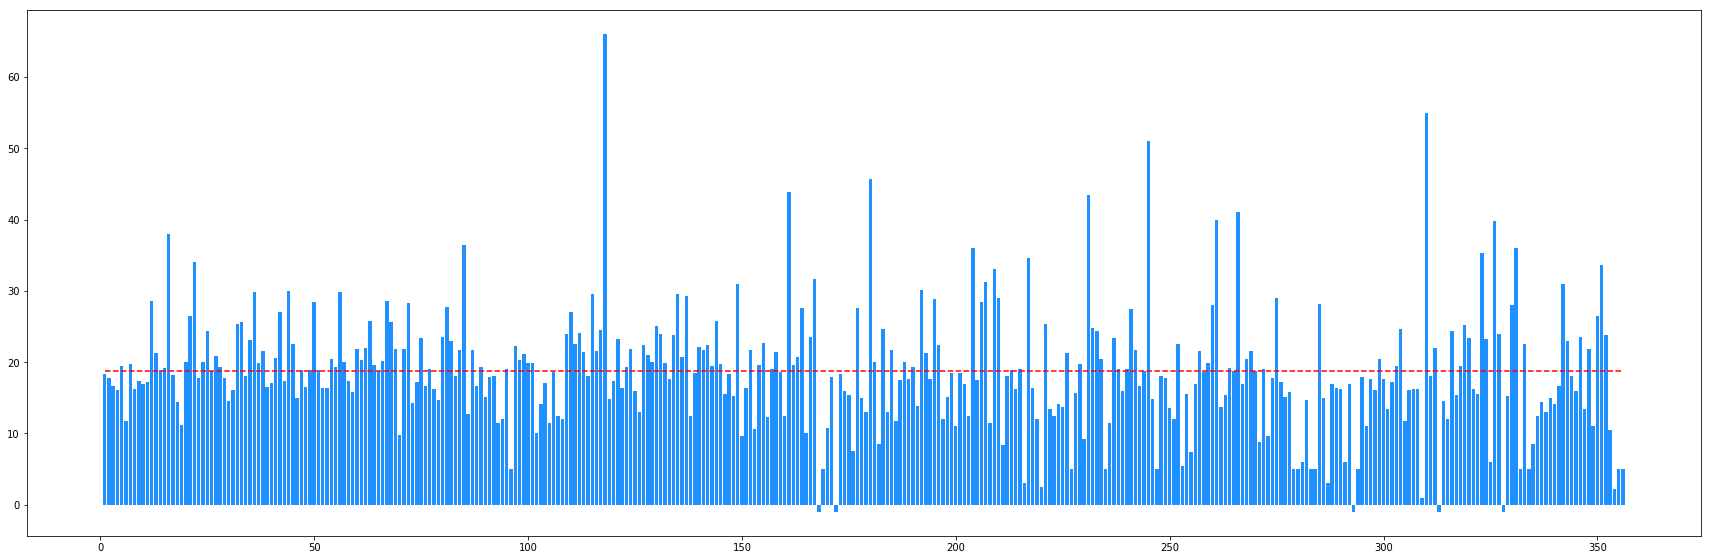

In [16]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_strike_rates, color = "dodgerblue")

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_strike_rates))
plt.plot(index_positions, mean, c = "red", linestyle='--')

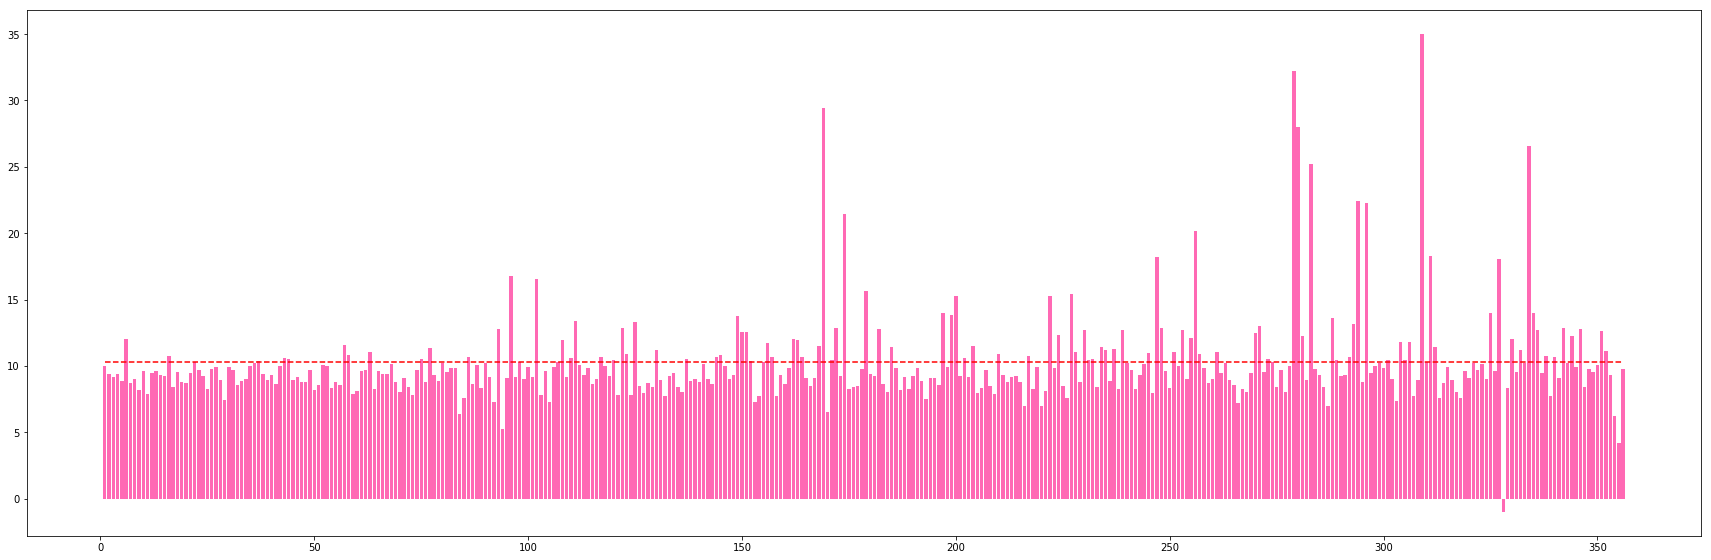

In [17]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_economy_rates, color = "hotpink")

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_economy_rates))
plt.plot(index_positions, mean, c = "red", linestyle='--')

## Scatterplots for the attributes

Text(0,0.5,'Runs scored')

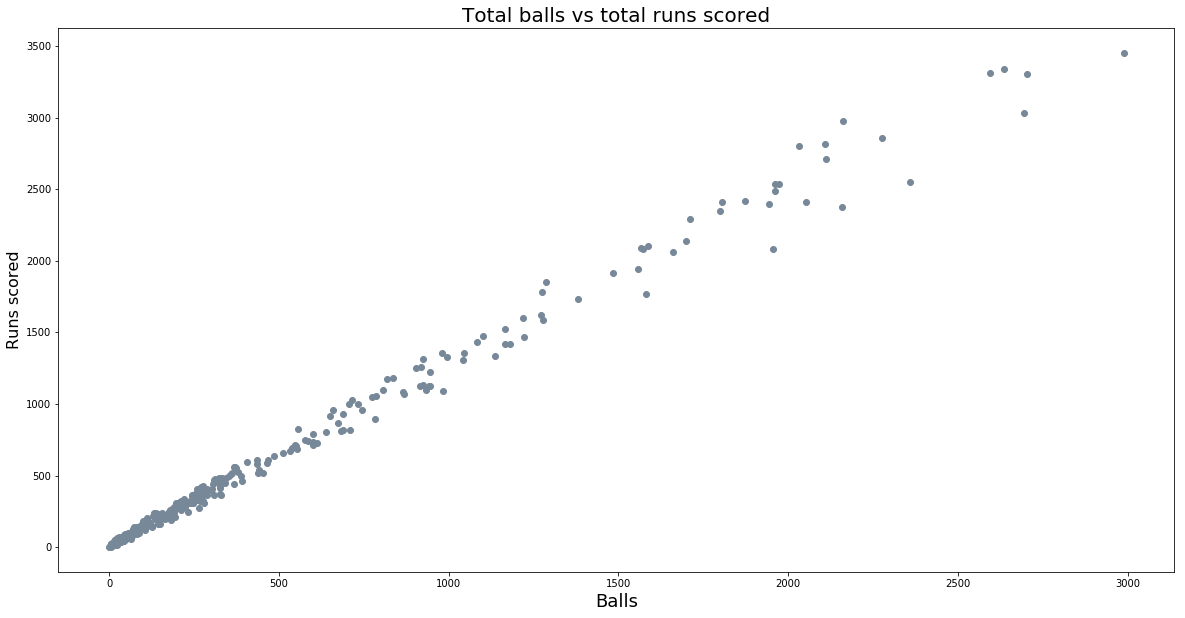

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_runs, c = "lightslategray")

plt.title("Total balls vs total runs scored", fontsize=20)
plt.xlabel('Balls', fontsize=18)
plt.ylabel('Runs scored', fontsize=16)

Text(0,0.5,'Dismissals')

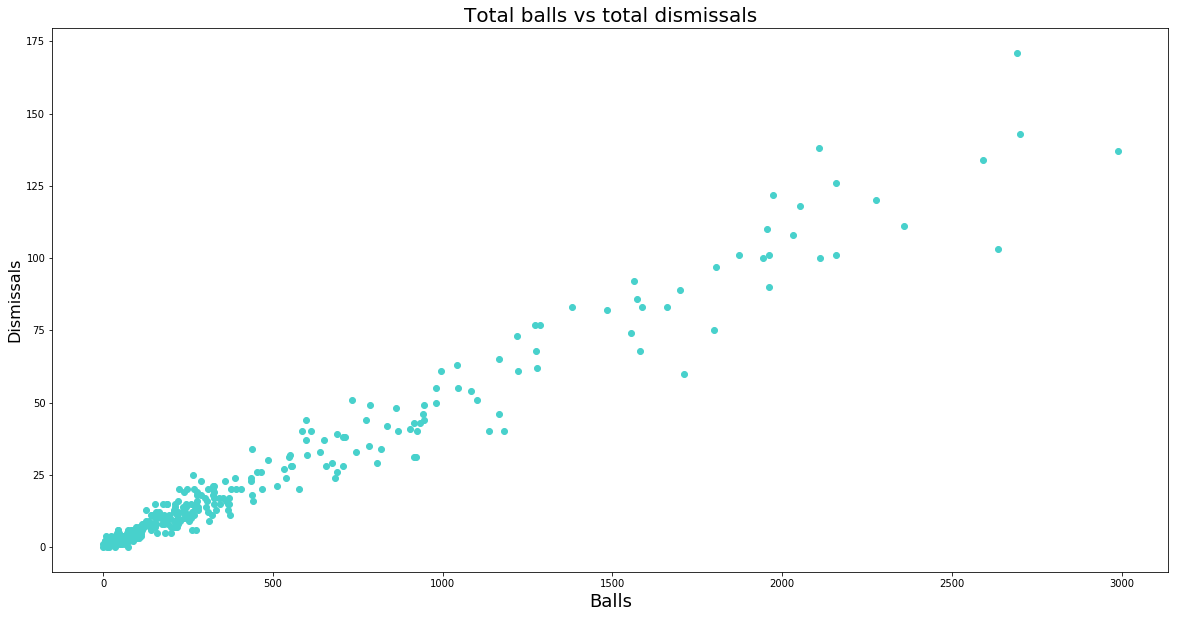

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_dismissals, c = "mediumturquoise")

plt.title("Total balls vs total dismissals", fontsize=20)
plt.xlabel('Balls', fontsize=18)
plt.ylabel('Dismissals', fontsize=16)

Text(0,0.5,'Dismissals')

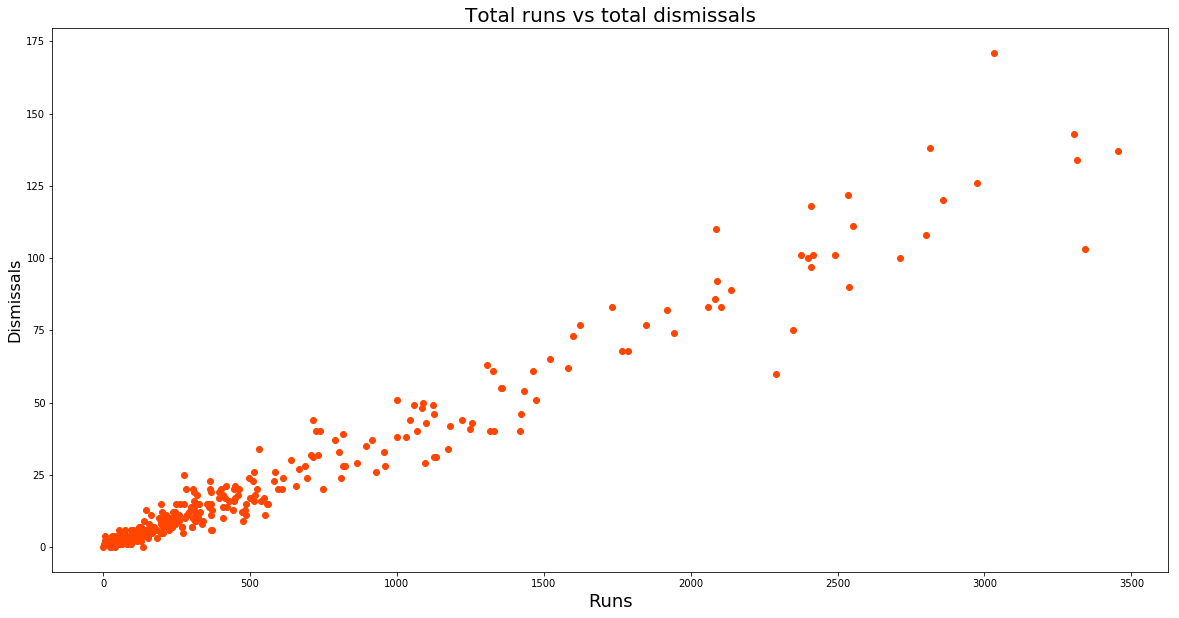

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(total_runs, total_dismissals, c="orangered")

plt.title("Total runs vs total dismissals", fontsize=20)
plt.xlabel('Runs', fontsize=18)
plt.ylabel('Dismissals', fontsize=16)

Text(0,0.5,'Wide balls')

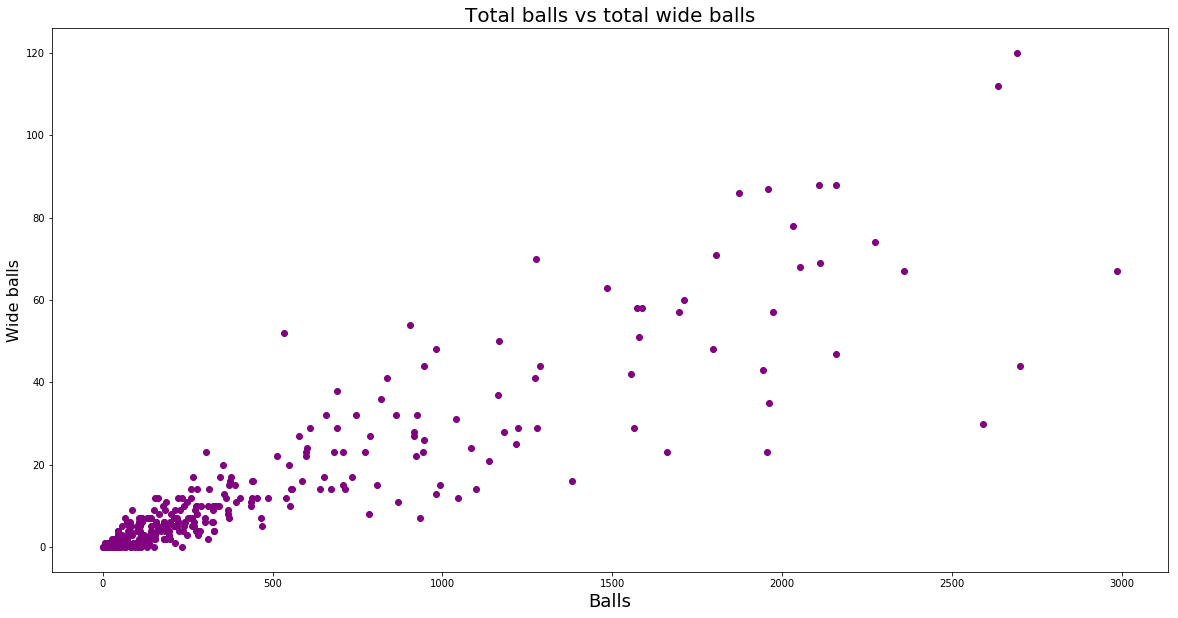

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_wideballs, c="purple")

plt.title("Total balls vs total wide balls", fontsize=20)
plt.xlabel('Balls', fontsize=18)
plt.ylabel('Wide balls', fontsize=16)

Text(0,0.5,'No balls')

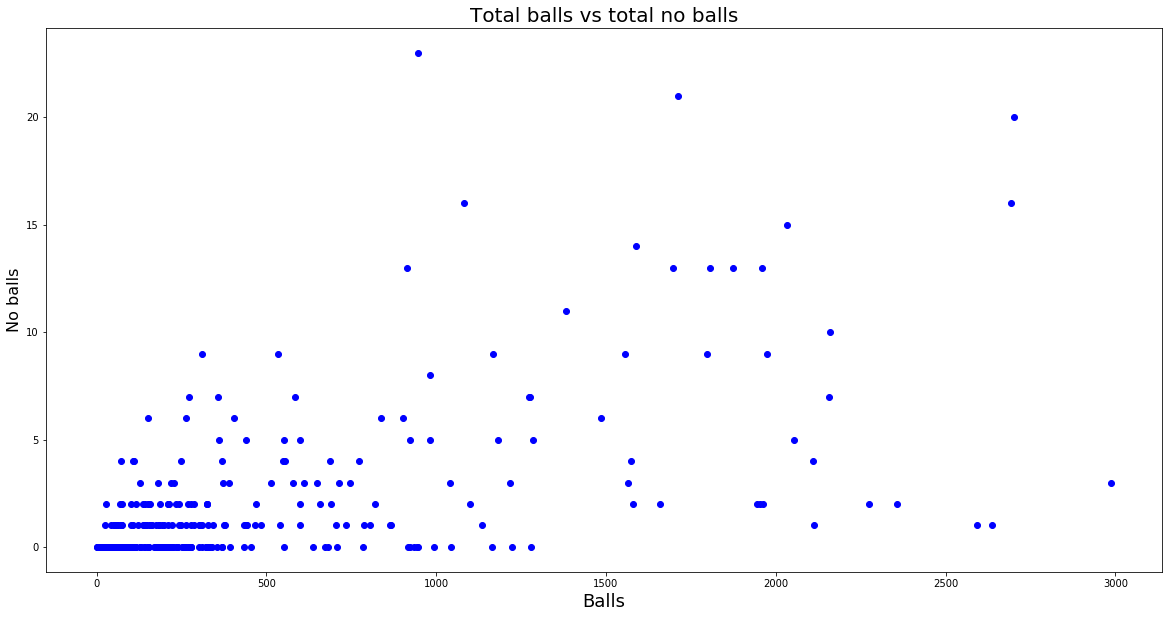

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_noballs, c="blue")

plt.title("Total balls vs total no balls", fontsize=20)
plt.xlabel('Balls', fontsize=18)
plt.ylabel('No balls', fontsize=16)

Text(0,0.5,'Economy rate')

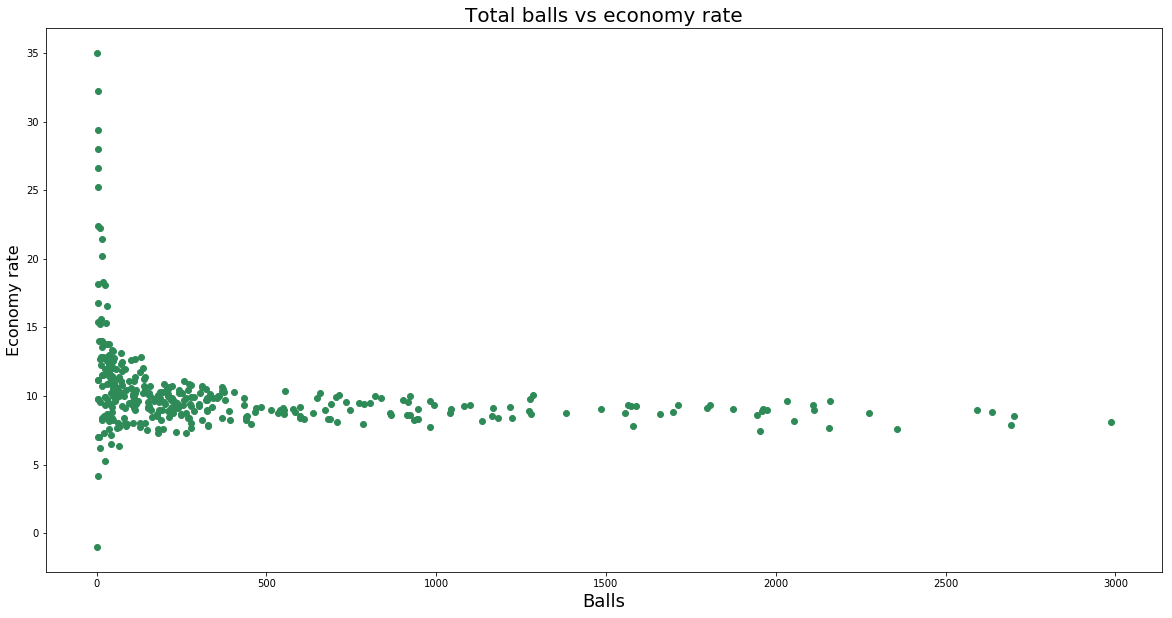

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_economy_rates, c = "seagreen")

plt.title("Total balls vs economy rate", fontsize=20)
plt.xlabel('Balls', fontsize=18)
plt.ylabel('Economy rate', fontsize=16)

## Top players in every category 

### Most balls delivered

In [24]:
top_overs = sorted(range(len(total_balls)), key=lambda i: total_balls[i])[-5:]

for value in top_overs[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_balls[value]))

**Harbhajan Singh** : 2988

**A Mishra** : 2702

**SL Malinga** : 2693

**P Kumar** : 2636

**PP Chawla** : 2593

### Most runs given

In [25]:
top_runs = sorted(range(len(total_runs)), key=lambda i: total_runs[i])[-5:]

for value in top_runs[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_runs[value]))

**Harbhajan Singh** : 3453

**P Kumar** : 3342

**PP Chawla** : 3315

**A Mishra** : 3305

**SL Malinga** : 3034

### Most dismissals taken

In [26]:
top_dismissals = sorted(range(len(total_runs)), key=lambda i: total_dismissals[i])[-5:]

for value in top_dismissals[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_dismissals[value]))

**SL Malinga** : 171

**A Mishra** : 143

**DJ Bravo** : 138

**Harbhajan Singh** : 137

**PP Chawla** : 134

### Highest bowling average

In [27]:
top_bowling_average = sorted(range(len(total_runs)), key=lambda i: total_bowling_average[i])[-5:]

for value in top_bowling_average[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_bowling_average[value]))

**K Goel** : 94.0

**K Upadhyay** : 81.0

**KAJ Roach** : 80.0

**AA Jhunjhunwala** : 65.0

**AUK Pathan** : 63.0

### Highest strike rates

In [28]:
top_strike_rates = sorted(range(len(total_runs)), key=lambda i: total_strike_rates[i])[-5:]

for value in top_strike_rates[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_strike_rates[value]))

**K Goel** : 66.0

**K Upadhyay** : 55.0

**KAJ Roach** : 51.0

**TM Dilshan** : 45.666666666666664

**V Kohli** : 43.833333333333336

### Highest economy rates

In [29]:
top_economy_rates = sorted(range(len(total_runs)), key=lambda i: total_economy_rates[i])[-5:]

for value in top_economy_rates[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_economy_rates[value]))

**SPD Smith** : 35.0

**I Malhotra** : 32.199999999999996

**LPC Silva** : 29.4

**B Chipli** : 28.0

**V Shankar** : 26.599999999999998

## 3D plots of the player performance metrics

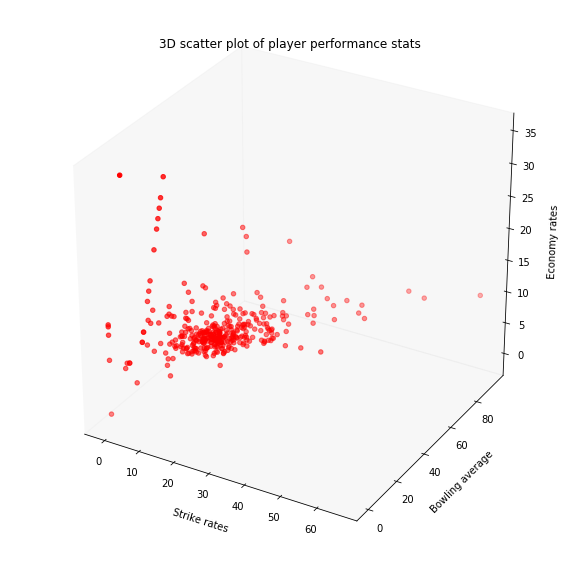

In [30]:
visualisation_3d = plt.figure(figsize=(10,10))
axes_3d = visualisation_3d.gca(projection='3d')

axes_3d.xaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))
axes_3d.yaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))
axes_3d.zaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))

axes_3d.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
axes_3d.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
axes_3d.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

axes_3d.set_xlabel('Strike rates', labelpad = 10)
axes_3d.set_ylabel('Bowling average', labelpad = 10)
axes_3d.set_zlabel('Economy rates', labelpad = 10)

axes_3d.set_title('3D scatter plot of player performance stats')
axes_3d.scatter(total_strike_rates,total_bowling_average,total_economy_rates,c="r")

## Formatting the data for clustering

In [31]:
cluster_dataset = []

for index in range(0, len(total_economy_rates)):
    cluster_dataset.append([total_strike_rates[index], total_bowling_average[index], total_economy_rates[index]])

## Applying clustering on the player stats

A player should have **lower** bowling average, strike rate and economy rates.

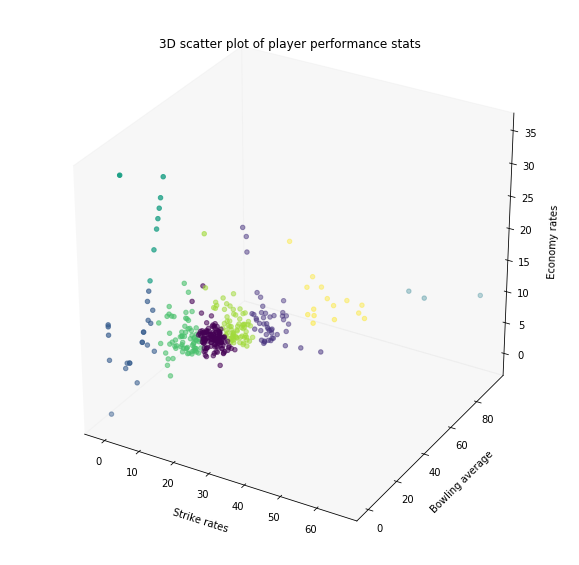

In [32]:
k_means = KMeans(n_clusters=8).fit(cluster_dataset)
k_means.labels_

visualisation_3d = plt.figure(figsize=(10,10))
axes_3d = visualisation_3d.gca(projection='3d')

axes_3d.xaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))
axes_3d.yaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))
axes_3d.zaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))

axes_3d.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
axes_3d.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
axes_3d.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

axes_3d.set_xlabel('Strike rates', labelpad = 10)
axes_3d.set_ylabel('Bowling average', labelpad = 10)
axes_3d.set_zlabel('Economy rates', labelpad = 10)

axes_3d.set_title('3D scatter plot of player performance stats')
axes_3d.scatter(total_strike_rates,total_bowling_average,total_economy_rates,c=k_means.labels_)

## Printing the players in different categories

In [33]:
index = 0
bowler_categories = ListTable()

bowler_categories.append(['Bowler name', 'Assigned cateogory'])
for player in bowler_names:
    bowler_categories.append([bowler_names[index], k_means.labels_[index] + 1])
    index = index + 1
bowler_categories

Bowler name,Assigned cateogory
TS Mills,1
A Choudhary,1
YS Chahal,1
S Aravind,1
SR Watson,1
TM Head,6
STR Binny,1
A Nehra,1
B Kumar,1
BCJ Cutting,1


## Insights into a single player

### Plotting the match-to-match performance of Ravindra Jadeja

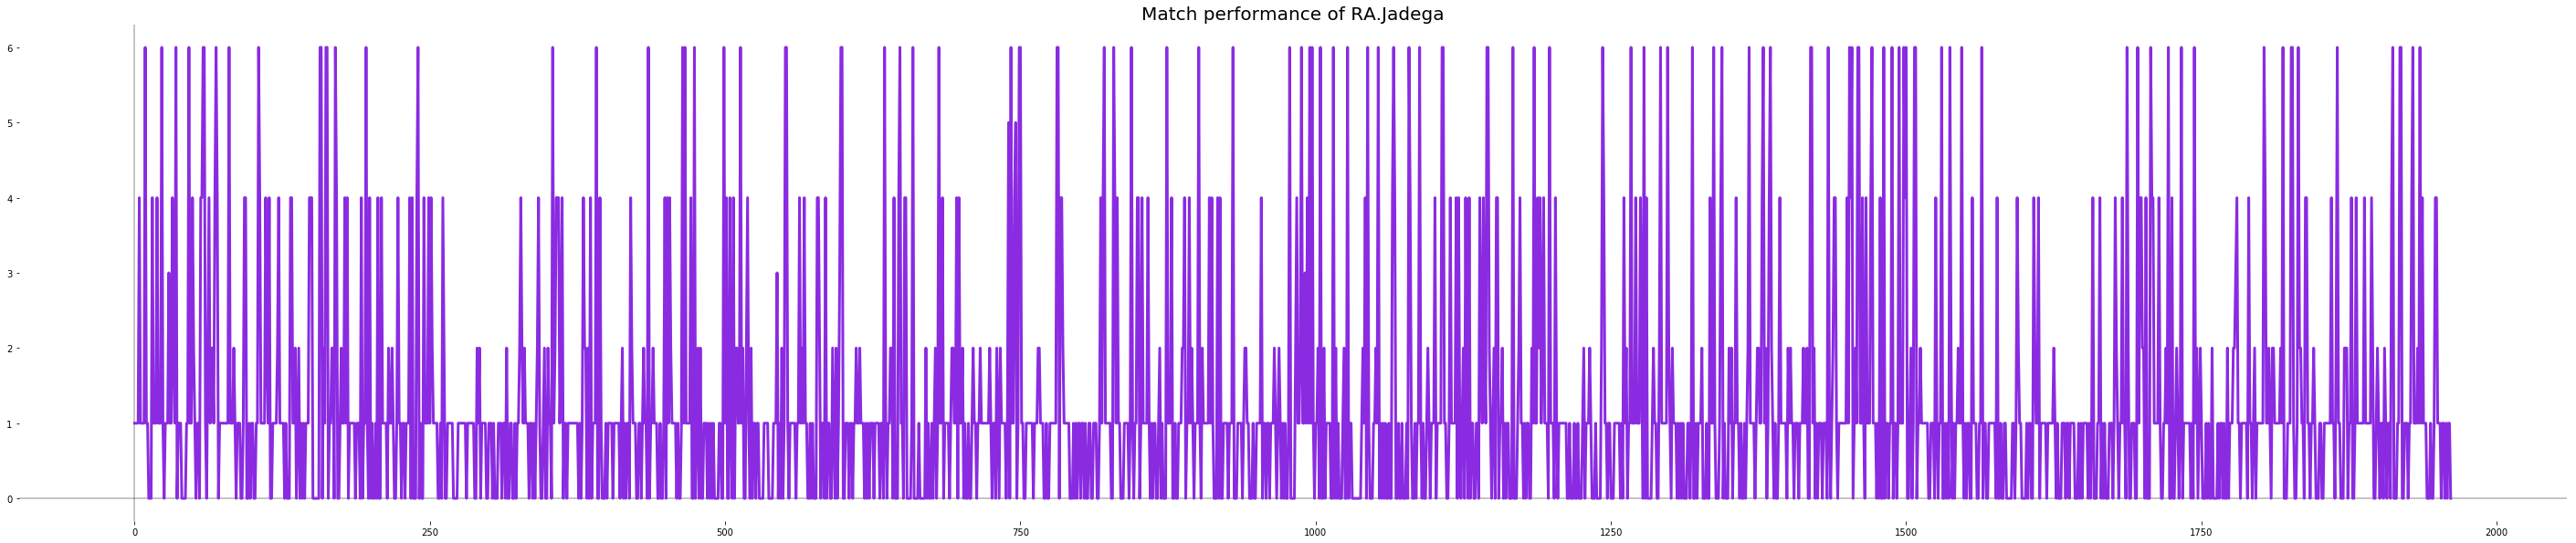

In [34]:
as_runs = []

for index in range(0, len(data_set['bowler'])):
    if(data_set['bowler'][index] == 'RA Jadeja'):
        as_runs.append(data_set['total_runs'][index])
        
plt.figure(figsize=(50,10))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.axhline(0, color='black', alpha = 0.3)
plt.axvline(0, color='black', alpha = 0.3)

plt.title('Match performance of RA.Jadega', fontsize = '20')
plt.plot(as_runs, linewidth=3.0, c = 'blueviolet')

### Setting up the auction prices for the player

In [35]:
# Considering the base price of the auction for the year 2012
price_2008 = 100000
price_2011 = 950000
price_2012 = 2000000

# Normalising the values
price_rates = [price_2008/60000, price_2011/60000, price_2012/60000]

runs_2008 = 0
runs_2011 = 0
runs_2012 = 0

wickets_2008 = 0
wickets_2011 = 0
wickets_2012 = 0

balls_2008 = 0
balls_2011 = 0
balls_2012 = 0

for index in range(0, len(data_set['bowler'])):
    if(int(data_set['season'][index]) >= 2012):
        if(data_set['bowler'][index] == 'RA Jadeja'):
            runs_2012 = runs_2012 + data_set['total_runs'][index]
            balls_2012 = balls_2012 + 1
            
            try:
                if(math.isnan(data_set['dismissal_kind'][index])):
                    wickets_2012 = wickets_2012
            except:
                wickets_2012 = wickets_2012 + 1
                
    elif(int(data_set['season'][index]) >= 2011):
        if(data_set['bowler'][index] == 'RA Jadeja'):
            runs_2011 = runs_2011 + data_set['total_runs'][index]
            balls_2011 = balls_2011 + 1
            
            try:
                if(math.isnan(data_set['dismissal_kind'][index])):
                    wickets_2011 = wickets_2011
            except:
                wickets_2011 = wickets_2011 + 1
    else:
        if(data_set['bowler'][index] == 'RA Jadeja'):
            runs_2008 = runs_2008 + data_set['total_runs'][index]
            balls_2008 = balls_2008 + 1
        
            try:
                if(math.isnan(data_set['dismissal_kind'][index])):
                    wickets_2008 = wickets_2008
            except:
                wickets_2008 = wickets_2008 + 1

### Working with the statistics

In [36]:
print('The statistics for the first part are: ', runs_2008, balls_2008, wickets_2008)
print('The statistics for the second part are: ', runs_2011, balls_2011, wickets_2011)
print('The statistics for the third part are: ', runs_2012, balls_2012, wickets_2012)

The statistics for the first part are:  177 157 7
The statistics for the second part are:  307 261 9
The statistics for the third part are:  2056 1544 73


In [37]:
sr_2008 = balls_2008/wickets_2008
sr_2011 = balls_2011/wickets_2011
sr_2012 = balls_2012/wickets_2012
sr_rates = [sr_2008, sr_2011, sr_2012]

ba_2008 = runs_2008/wickets_2008
ba_2011 = runs_2011/wickets_2011
ba_2012 = runs_2012/wickets_2012
ba_rates = [ba_2008, ba_2011, ba_2012]

ea_2008 = runs_2008/(float(balls_2008)/7)
ea_2011 = runs_2011/(float(balls_2011)/7)
ea_2012 = runs_2012/(float(balls_2012)/7)
ea_rates = [ea_2008, ea_2011, ea_2012]

print(sr_rates, ba_rates, ea_rates, price_rates)

[22.428571428571427, 29.0, 21.15068493150685] [25.285714285714285, 34.111111111111114, 28.164383561643834] [7.891719745222931, 8.233716475095786, 9.321243523316062] [1.6666666666666667, 15.833333333333334, 33.333333333333336]


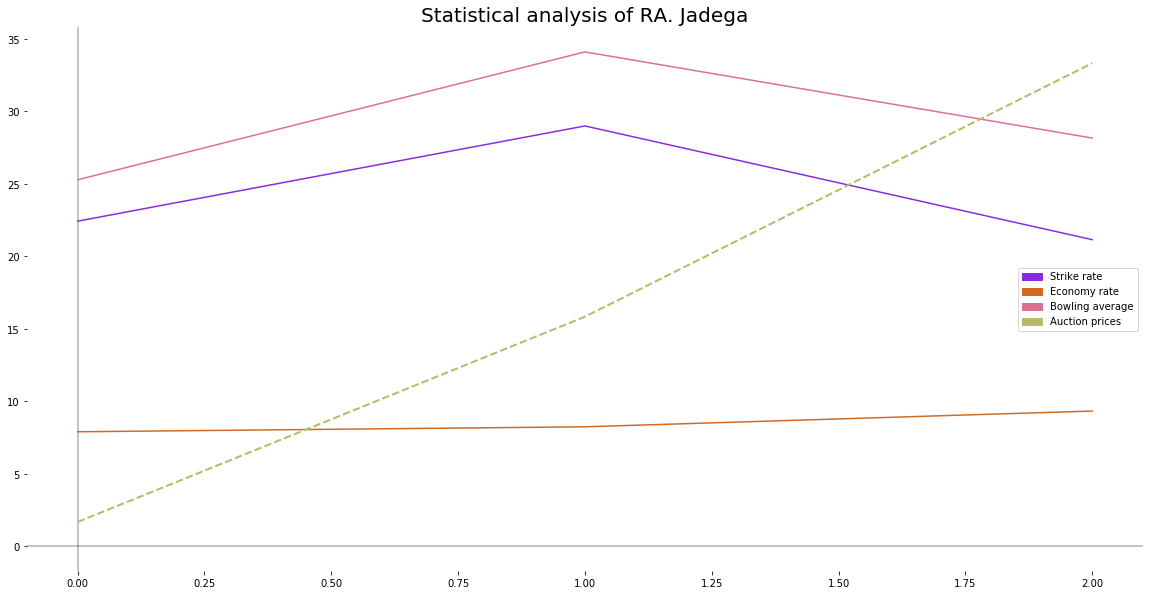

In [38]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.axhline(0, color='black', alpha = 0.3)
plt.axvline(0, color='black', alpha = 0.3)

plt.title('Statistical analysis of RA. Jadega', fontsize = '20')
plt.plot(sr_rates, linewidth=1.5, c = 'blueviolet')
plt.plot(ea_rates, linewidth=1.5, c = 'chocolate')
plt.plot(ba_rates, linewidth=1.5, c = 'palevioletred')

label_1 = mpatches.Patch(color='blueviolet', label='Strike rate')
label_2 = mpatches.Patch(color='chocolate', label='Economy rate')
label_3 = mpatches.Patch(color='palevioletred', label='Bowling average')
label_4 = mpatches.Patch(color='darkkhaki', label='Auction prices')

plt.legend(handles=[label_1, label_2, label_3, label_4])

plt.plot(price_rates, linestyle='dashed', linewidth=2.0, c = 'darkkhaki')